# Lab: Data Wrangling

In this exercise we will extract tabular data from an article published in an online scientific journal. We will touch on the following topics:

- Extraction of data from HTML pages
- Data cleanup using Pandas
- Data visualization
- CSV export
- FAIR data principles

## Extract data from a scientific paper

This will extract Table 1 from the scientific paper [_NMR determination of pKa values in α‐synuclein_](https://doi.org/10.1002/pro.556).
It is a nice study of the acid dissociation constants of amino acids inside a protein, measured using NMR spectroscopy.

The first extraction below is messy, so a bit of cleanup is needed.
Note that `pandas` requires that the `lxml` package is installed.
To run this, do the following:
1. Follow the link to the above paper, assuming you have full-text access
2. Save the page as `croke.html` and place it in this folder
3. Run the cell below

In [1]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_html("croke.html")[0]["No salt"]
df.head() # prints only the first columns

,Site,pKa,n,δlow,δhigh
0,Asp2,3.61 ± 0.05,1.30 ± 0.21,38.64 ± 0.09,41.99 ± 0.06
1,Glu13c,4.21 ± 0.06,0.90 ± 0.08,33.11 ± 0.08,36.79 ± 0.08
2,Glu20,4.07 ± 0.04,0.93 ± 0.06,33.10 ± 0.05,36.74 ± 0.04
3,Glu28,4.20 ± 0.06,0.96 ± 0.09,33.16 ± 0.08,36.92 ± 0.08
4,Glu35d,4.17±0.06,0.93 ± 0.08,33.11 ± 0.07,36.69 ± 0.07


### Task 1

The above table cannot be readily processed for various reasons. Firstly, the numbers are actually _strings_ and contain the unicode character `±`.
Secondly, values and errors are mixed.
Your task is now to cleanup the above table so that it looks like this (we have only printed the first four rows here):

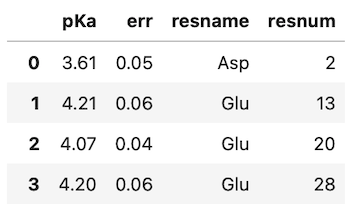

In your report, document and motivate your code.

#### Hints:
1. Do this in small steps!
1. This cleanup is mostly an exercise in how to use Pandas. There's plenty of online information about this and you may search for _"Delete pandas column"_ etc.
1. Try to run `df.pKa.str.split("±").str.get(0).astype(float)` in a cell. Figure out what each method is doing.
1. Columns can be assigned with `df.assign()` or dropped with `df.drop()`.
1. Some values in the `Site` column are suffixed by letters `c` and `d`. Use `str.replace()` to get rid of these.
1. Combined residue name and number can be split using [_regex_](https://en.wikipedia.org/wiki/Regular_expression), i.e. something like `str.split("([A-Za-z]+)(\d+)")`.

### Task 2

Export the above data to a CSV file. Motivate why or why not this is a good idea?

### Task 3

The acid dissocitation constant of an isolated glutamic acid is p$K_a^0$=4.1.
As a function of residue number, plot the shift from this reference value for all glutamates in the above tabel.
_Hints:_ Use matplotlib and a Pandas mask using e.g. `sel = df.resname == "Glu"`.
Your plot could look something like the following:

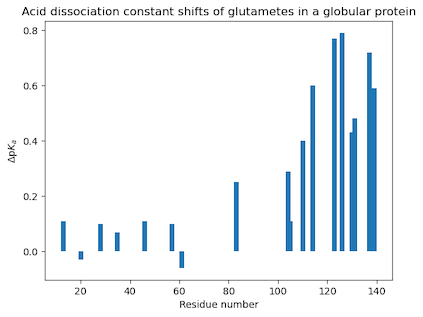

## Report

The report can be based on this Notebook.  It should in addition to answers to the above tasks include a disucussion about how the original paper relates to the FAIR data principles.
If you were the author of the paper, would you change anything?
